# Welcome

Before we start, look for the Kernel tab and press: Kernel > Restart & Clear Output. This just resets the development environment. Now we are ready to get started!

With our Python fundamentals covered, we can now turn to analyzing some data. For this lab we will be working with Pokemon! This iPython notebook comes along with data files that we will be using to run some analysis on. This data is stored [here](https://github.com/hknserv/workshops/tree/master/cs-workshops/data-workshop/data) and is accessible by this notebook!

1. `pokemon.csv` contains the pokemon characteristics (the first column being the id of the pokemon).
2. `pokemon_randomized.csv` contains the same pokemon characteristics, but shuffled around (for fun!).
3. `combats.csv` contains information about previous combats. The first two columns contain the ids of the combatants and the third one the id of the winner. Important: The pokemon in the first columns attacks first.

Feel free to follow the link above and take a look like at the data for yourself. Our data is in a `csv` format which stands for comma-separated values. Basically, our data comes in a table, with entries separated by commas.

# Introduction: Ash Ketchum

Ash Ketchum once stated: "I want to be the very best, like no one ever was." With those words, Ash set out on his quest to become a Pokemon master. Oddly enough, he *still* has not won a single Pokemon League Championship, despite competing in 6. Today, we're going to explore the Pokemon dataset in order to hone our data science techniques and become Pokemon masters!

<img src="ash.jpg">

## Reading in Data

To be able to do anything with this data, we first need to read the data into python. Luckily, this is such a common task that there are already many tools for working with, reading and visualizing data. We'll be using a library called `Pandas` for data analysis. `Pandas` is currently one of the most popular data analysis libraries, and is used in many UC Berkeley Data Science courses. Below, we import Pandas and some other functions to read the data.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting
import seaborn as sns # aesthetics
%config InlineBackend.figure_format = 'retina'

In [2]:
# Read pokemon statistics and print first 10 rows out of 800
data = pd.read_csv('data/pokemon_randomized.csv')
print(len(data))
data.head(10)

800


,Unnamed: 0,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,1,Manectric,Fighting,Flying,70,110,80,55,80,105,1,False
1,2,2,Carvanha,Fighting,Flying,60,40,80,60,45,40,1,False
2,3,3,Shuppet,Dark,NaN,110,123,65,100,65,65,5,False
3,4,4,Beautifly,Normal,NaN,68,125,65,65,115,80,4,False
4,5,5,Slakoth,Normal,NaN,65,130,60,75,60,75,3,False
5,6,6,Kyurem,Grass,NaN,84,71,43,71,43,48,3,False
6,7,7,Volcanion,Water,Ice,59,110,150,45,49,35,6,False
7,8,8,Simipour,Grass,Ghost,40,30,50,55,55,100,1,False
8,9,9,Feebas,Electric,Bug,45,45,35,20,30,20,3,False
9,10,10,Diglett,Water,NaN,86,76,86,116,56,95,4,False


The code above loads the randomized Pokemon data into the `data` variable. You can think of the data variable now containing the entire table of data that you can see [here](https://github.com/hknserv/workshops/blob/master/cs-workshops/data-workshop/data/pokemon_randomized.csv). Then `len()` function determines the number of entries in a list or a dataset and in this case gives us the total number of Pokemon in our dataset.

## Visualizing Data: Matplotlib

The first step to strong data analysis is being able to visualize the data provided. You likely have generated plots before using Google Sheets or Microsoft Excel, but now we can do the same thing (with much more flexibility) with Python code! Matplotlib is a Python library that helps us plot data: the most basic plots are line, scatter and histogram plots.

- Line plots are usually used when the x-axis is time
- Scatterplots are better when we want to check if there is correlation between two variables
- Histograms visualize the distribution of numerical data

Matplotlib allows us to customize the colors, labels, thickness of lines, title, opacity, grid, figure size... Basically, we can make any graph conceivable, though some are easier than others.

Below we will plot the speed and defense attributes of our data (see the table output above). We can get the "Speed" column by saying `data['Speed']` and then we can plot that data by using the `plot()` function as you can see below. Try running the code below!

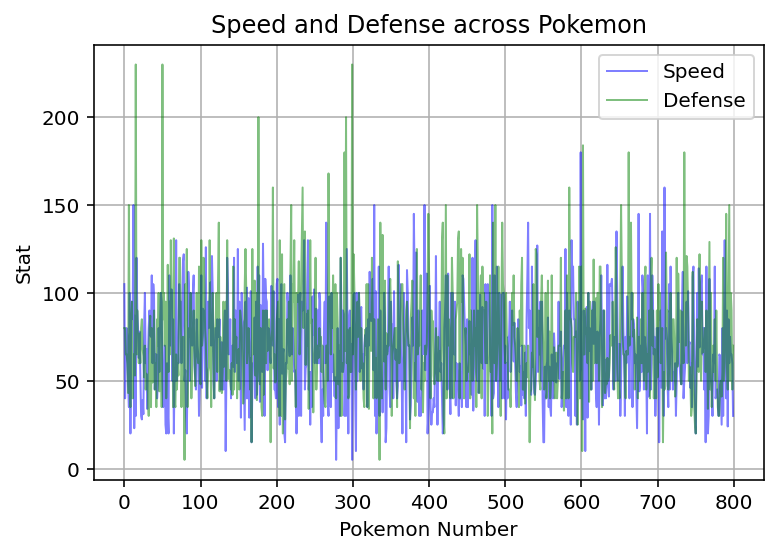

In [7]:
# LINE PLOTS
data['Speed'].plot(
    kind='line', # Type of plot
    color='blue', # Line color
    label='Speed', # Legend name
    linewidth=1,
    alpha = 0.5, # Transparency
    grid = True
)
data['Defense'].plot(
    color='green',
    label='Defense',
    linewidth=1,
    alpha = 0.5,
    grid = True
)

plt.legend(loc='upper right') # legend locations
plt.xlabel('Pokemon Number') # x-axis label
plt.ylabel('Stat') # y-axis label
plt.title('Speed and Defense across Pokemon') # Title
plt.show()

Now we can try and plot relationships in the data. For example we can plot the relationship between the "Attack" and "Defense" attributes by running the code below. Each point on the graph represents a different Pokemon! Try modifying the code below to see the relationship between "HP" (Pokemon health) and "Attack". Also try to change the title and axis labels for the graph as well if you try plotting different attributes!

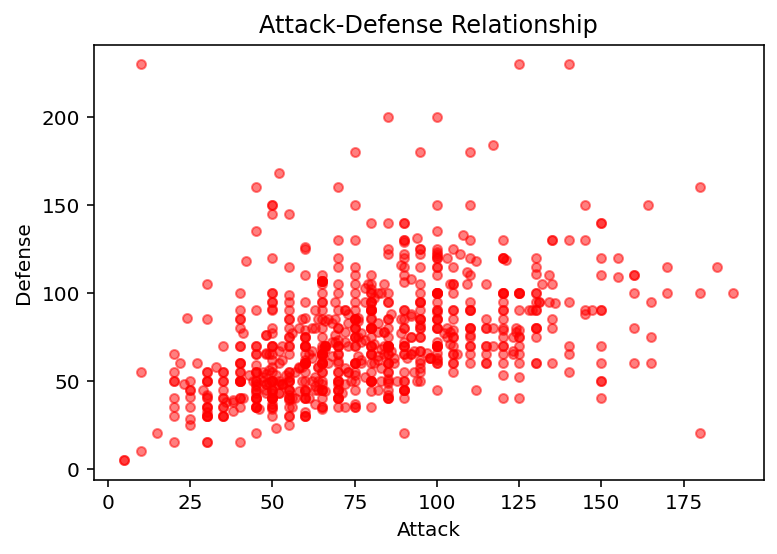

In [14]:
# SCATTER PLOT
data.plot(
    kind='scatter', # Type of plot
    x='Attack', # x-axis column
    y='Defense', # y-axis column
    alpha = 0.5, # Transparency
    color = 'red'
)
plt.xlabel('Attack') # x-axis label
plt.ylabel('Defense') # y-axis label
plt.title('Attack-Defense Relationship') # Title
plt.show()

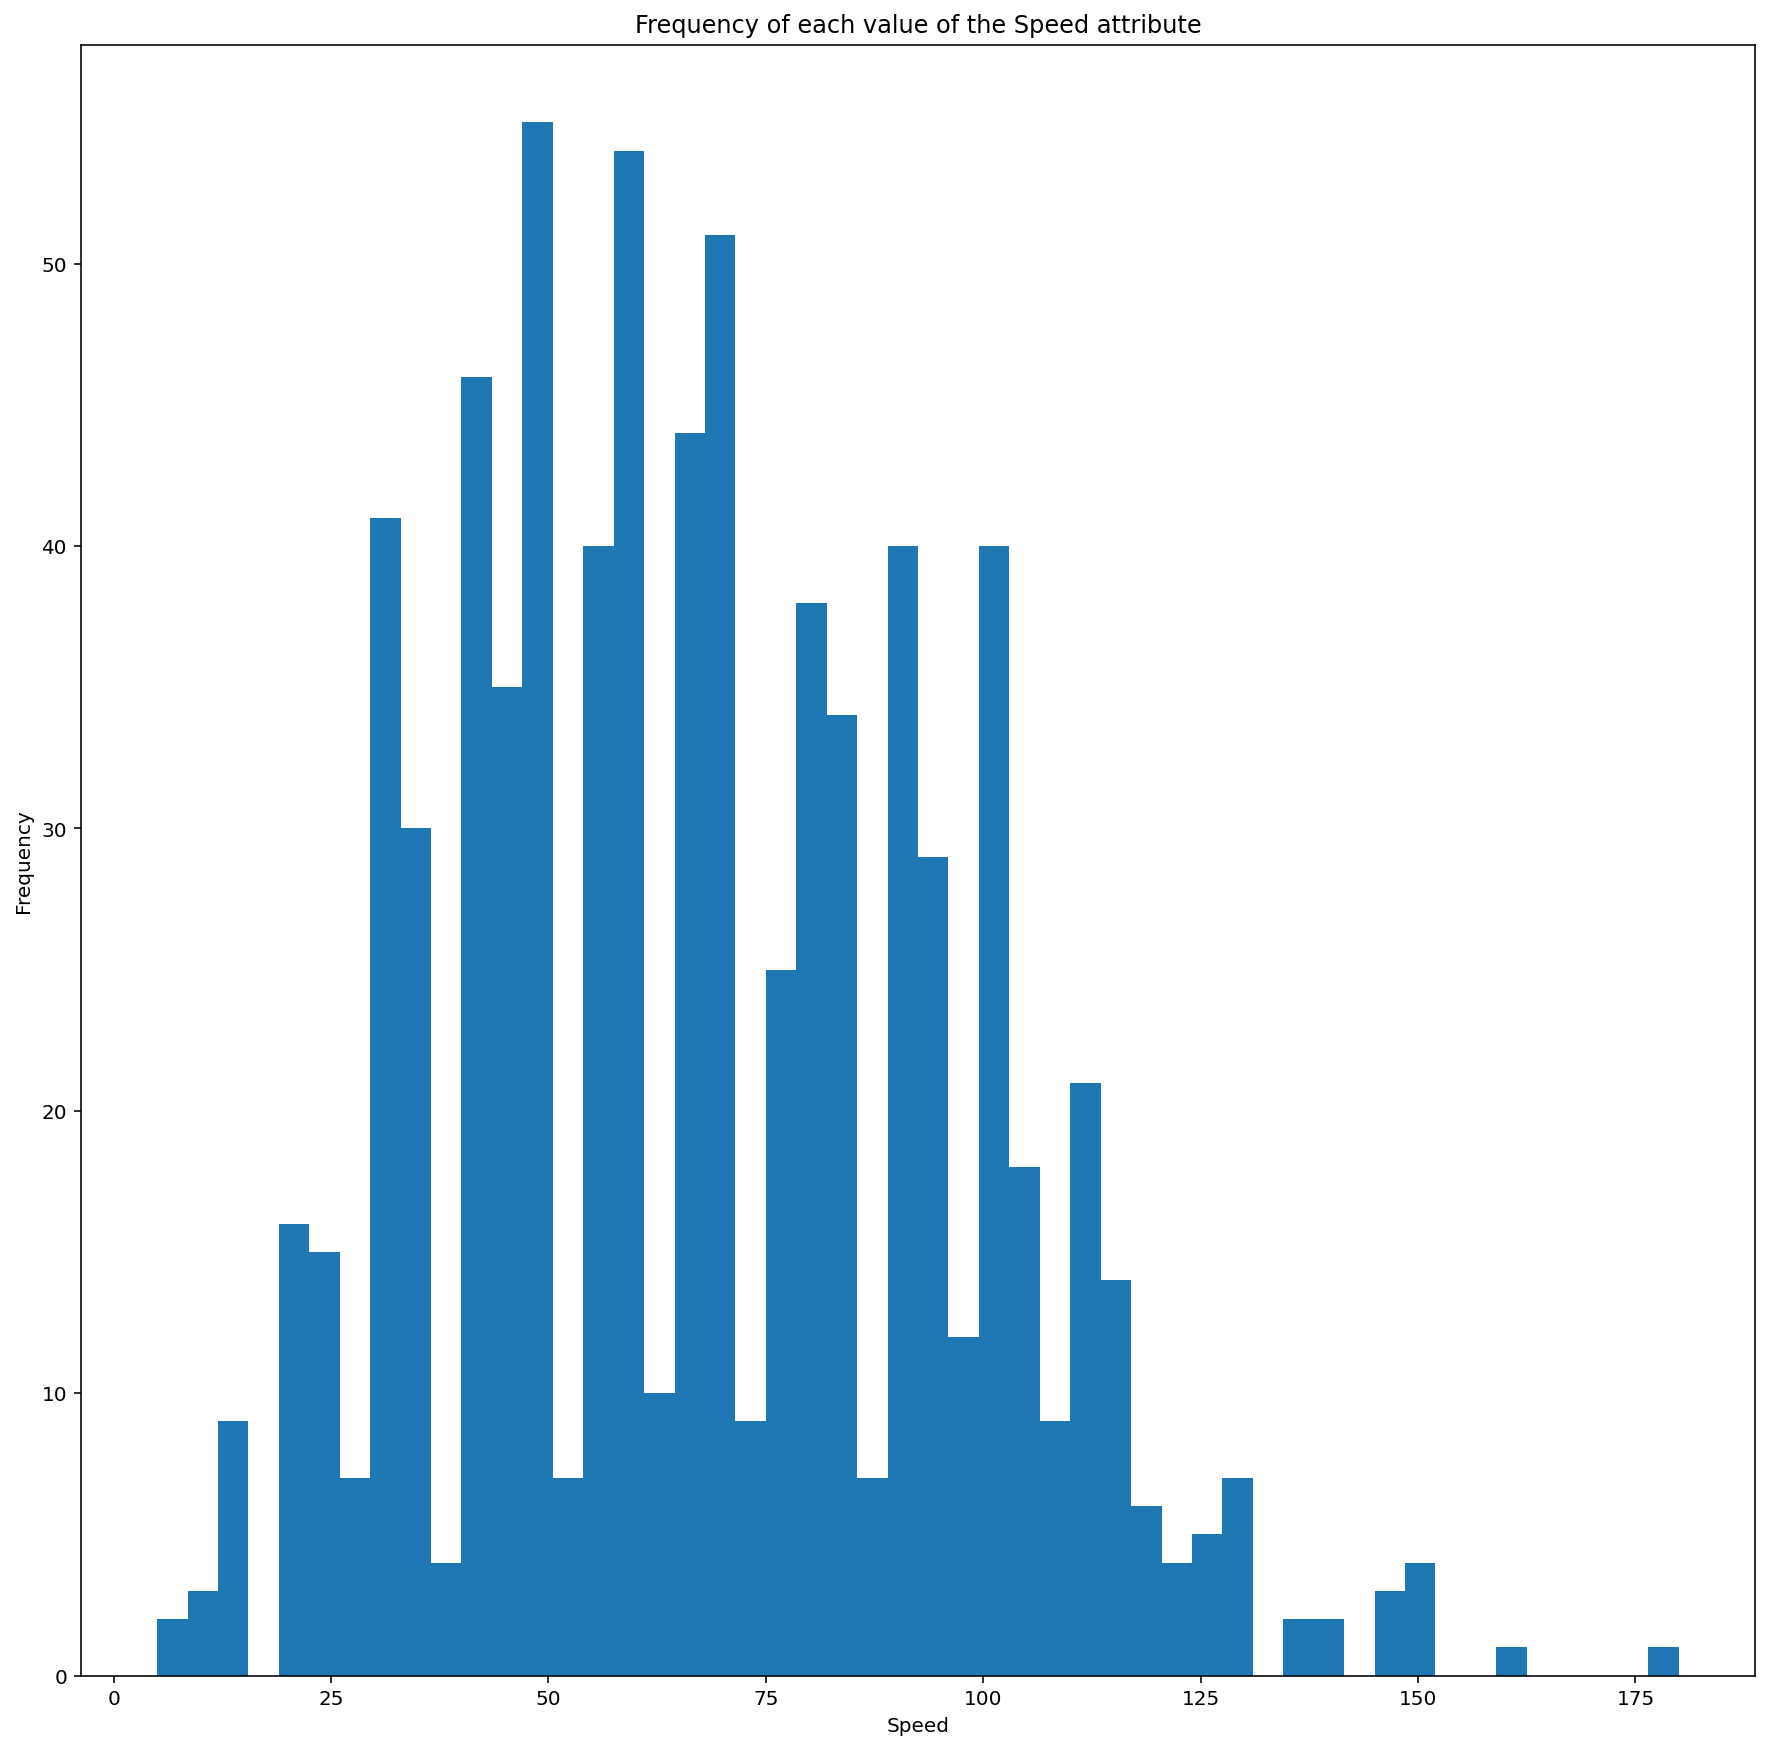

In [17]:
# HISTOGRAM
data['Speed'].plot( # Choosing what to plot
    kind = 'hist', # Histogram plot
    bins = 50,
    figsize = (15, 15) # Size of graph
)

plt.xlabel('Speed') # x-axis label
plt.title('Frequency of each value of the Speed attribute') # Title
plt.show()

## Manipulating Data: Pandas

This list of Pandas functions will come in handy: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

The table from which we are getting the data from is called a DataFrame. Each of the columns can be thought of as a list or series of data, which can be accessed similar to the way we access elements in a list.

### Grabbing Data
When manipulating our data, it can be helpful to grab specific rows and columns. Here, we use the `head` and `tail` functions to grab the Defense stats of the first 5 Pokemon in our dataset and the Attack stats of the last 5 Pokemon in our dataset.

In [22]:
print("ID   Attack")
print(data['Defense'].head(5))
print()
print("ID   Attack")
print(data['Attack'].tail(5))

ID   Attack
0    80
1    80
2    65
3    65
4    60
Name: Defense, dtype: int64

ID   Attack
795    60
796    50
797    80
798    70
799    55
Name: Attack, dtype: int64


We can access columns with the simple `dot property`. Let's say that we only want to see a Pokemon's name and which row they are in in our dataset. We can simply use `data.Name` to do this!
**Note: Column names are case sensitive!**

In [24]:
names = data.Name # This selects just the "Name" column
names.head(13)

0                Manectric
1                 Carvanha
2                  Shuppet
3                Beautifly
4                  Slakoth
5                   Kyurem
6                Volcanion
7                 Simipour
8                   Feebas
9                  Diglett
10    Gourgeist Large Size
11                 Linoone
12                    Axew
Name: Name, dtype: object

We can also access rows and columns using the the `iloc` and `loc` functions. Let's say that we want to grab rows 20 to 23 in our dataset. `tail` and `head` functions can't do this, but `iloc` can!

In [25]:
middle_rows = data.iloc[20:24] # Select rows from 20 (inclusive) to 24 (exlusive)
middle_rows

,Unnamed: 0,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
20,21,21,Pumpkaboo Large Size,Fairy,Ground,85,56,77,50,77,78,6,False
21,22,22,Patrat,Water,NaN,60,85,60,85,60,55,3,False
22,23,23,Lucario,Bug,NaN,60,95,80,60,80,30,1,False
23,24,24,Mega Gardevoir,Water,Rock,55,69,85,32,35,28,6,False


Now, let's say we only care about a Pokemon's Types, Attack, and Defense. We can grab these columns with the `loc` function. Notice that to grab columns, we add a `:,` before we specify which columns we want!

In [27]:
columns = data.loc[:, '#' : 'Defense'] # selects all columns from the "#" column to the "Defense" column
columns.head(5) # print the first 5 rows

,#,Name,Type 1,Type 2,HP,Attack,Defense
0,1,Manectric,Fighting,Flying,70,110,80
1,2,Carvanha,Fighting,Flying,60,40,80
2,3,Shuppet,Dark,NaN,110,123,65
3,4,Beautifly,Normal,NaN,68,125,65
4,5,Slakoth,Normal,NaN,65,130,60


Another helpful function is the `drop` function. It's pretty self explanatory, so you can read the documentation yourself on the Pandas cheat sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

### Filtering and Concatenating Data

We can also filter data easily. Let's say we want to show all the pokemon with more than 200 defense. We do this by checking if the defense of each row is greater than 200 and then only asking for the rows for which this is true. It turns out that there are only 3 pokemon like this! Change the condition to see what else you can discover.

In [28]:
strong_defenders = data['Defense'] > 200
data[strong_defenders]

,Unnamed: 0,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
15,16,16,Electivire,Bug,Steel,75,125,230,55,95,30,2,False
50,51,51,Mega Blastoise,Grass,NaN,70,140,230,60,80,50,3,False
299,300,300,Metagross,Psychic,Flying,20,10,230,10,230,5,2,False


What if we want to find all the Pokemon with more than 175 attack? This is easy too!

In [29]:
strong_attackers = data['Attack'] > 175
data[strong_attackers]

,Unnamed: 0,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
234,235,235,Relicanth,Grass,NaN,100,180,160,150,90,90,3,True
236,237,237,Palpitoad,Normal,NaN,106,190,100,154,100,130,1,True
483,484,484,Nidoran♂,Normal,NaN,50,180,20,180,20,150,3,True
624,625,625,Fletchling,Rock,Flying,80,185,115,40,105,75,2,False
717,718,718,Dewgong,Poison,NaN,105,180,100,180,100,115,3,True


If we want to build a super strong Attack/Defense Pokemon team, we can use `pd.concat` to add these two sets of data to form a new dataset!

In [30]:
strong_pokemon = pd.concat([data[strong_defenders], data[strong_attackers]])
strong_pokemon

,Unnamed: 0,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
15,16,16,Electivire,Bug,Steel,75,125,230,55,95,30,2,False
50,51,51,Mega Blastoise,Grass,NaN,70,140,230,60,80,50,3,False
299,300,300,Metagross,Psychic,Flying,20,10,230,10,230,5,2,False
234,235,235,Relicanth,Grass,NaN,100,180,160,150,90,90,3,True
236,237,237,Palpitoad,Normal,NaN,106,190,100,154,100,130,1,True
483,484,484,Nidoran♂,Normal,NaN,50,180,20,180,20,150,3,True
624,625,625,Fletchling,Rock,Flying,80,185,115,40,105,75,2,False
717,718,718,Dewgong,Poison,NaN,105,180,100,180,100,115,3,True


### Assignment: Build Ash's Team

Now, we have enough tools to build Ash's team! Ash's Pokemon are the following:
-  Pikachu
-  Squirtle
-  Bulbasaur
-  Tauros
-  Lapras
-  Charizard

Use your data analysis skills to grab the rows containing these 6 Pokemon and add them to a new dataframe! We have started the code for you by selecting Pikachu, but try getting the other Pokemon from the list above.

*Hint: Use filtering and concatenation*

In [33]:
pikachu = data[data['Name'] == 'Pikachu']
# Add more variables here with each of the other pokemon

# Now modify the list that currently contains just Pikachu to include your other Pokemon
# Remeber that elements in a list are separate by commas. For example: [1, 2, 3]
ash_team = pd.concat([pikachu]) 
ash_team

,Unnamed: 0,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
536,537,537,Pikachu,Normal,NaN,125,58,58,76,76,67,2,False


### Sorting Data

We successfully built Ash's team! However, it seems like the Pokemon are a bit out of order. Let's fix that with the `pd.sort_values()` function.

In [34]:
#First argument of sort_values is the column by which we are sorting
#Second argument determines whether we want to sort from lowest to highest or highest to lowest.
#Set ascending to True if we want to sort from lowest to highest

ash_team = ash_team.sort_values('#', ascending = True) # in this case we are sorting by Pokemon number ("#" column)
ash_team

,Unnamed: 0,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
536,537,537,Pikachu,Normal,NaN,125,58,58,76,76,67,2,False


## Data Analysis: Pandas

Now we can analyze of the data on the pokemon—the easiest way to get an idea of how how data looks is to plot some of it and get a few facts about it. Luckily for us, it is really easy to get the following from our table:

- count: number of entries
- mean: the average numberr, over all pokemon
- std: standard deviation, measures how spread out the data is
- min: minimum entry
- 25%: first quantile (25% are below)
- 50%: median or second quantile (50% are below)
- 75%: third quantile (75% are below)
- max: maximum entry

In [35]:
data.describe()

,Unnamed: 0,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


From this overview, we can easily see the minimimum and maximum for each of these statistics. To visualize this, we often use a boxplot, which allows us to easily picture the average, spread and outliers. The black bars the top and bottom show the maximum and minimum data points. The red line in the middle is at the mean and the box shows the distance from the 25th to the 75th percentile.

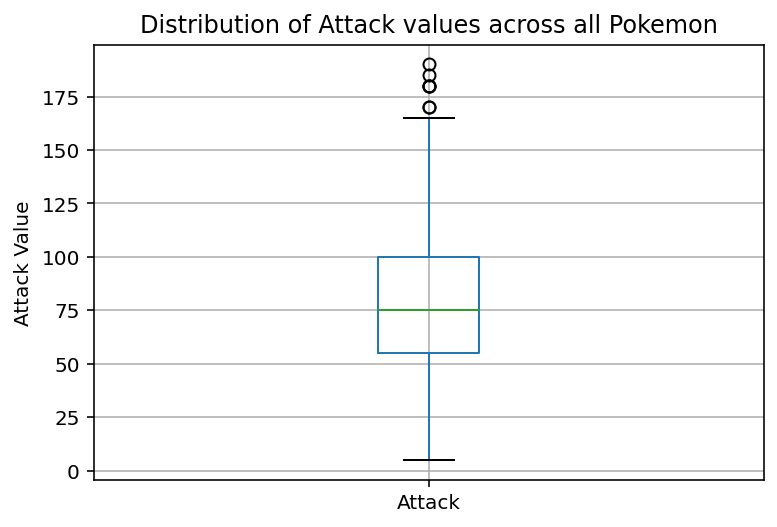

In [37]:
data.boxplot(
    column='Attack'
)
plt.ylabel('Attack Value') # x-axis label
plt.title('Distribution of Attack values across all Pokemon') # Title
plt.show()

Notice that some of our pokemon are legendary while others are not. We might guess that the attack of legendary pokemon are greater than non-legendary pokemon. We could test our hypothesis by creating a boxplot for the attacks of each group. We can easily do this using the `by` keyword.

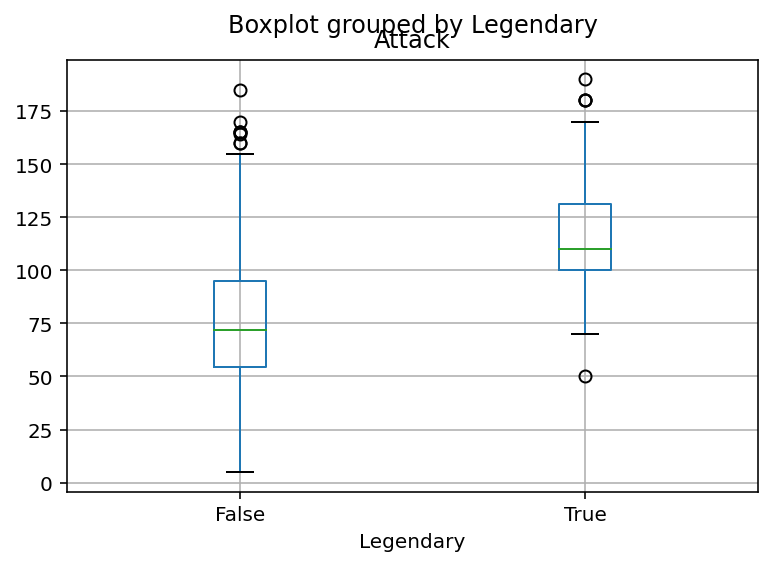

In [38]:
data.boxplot(
    column='Attack', # Column plotting
    by='Legendary' # Group
)
plt.show()

Now, let's compare Ash's team statistics to the general Pokemon dataset statistics.

In [39]:
ash_team.describe()

,Unnamed: 0,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,537.0,537.0,125.0,58.0,58.0,76.0,76.0,67.0,2.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,537.0,537.0,125.0,58.0,58.0,76.0,76.0,67.0,2.0
25%,537.0,537.0,125.0,58.0,58.0,76.0,76.0,67.0,2.0
50%,537.0,537.0,125.0,58.0,58.0,76.0,76.0,67.0,2.0
75%,537.0,537.0,125.0,58.0,58.0,76.0,76.0,67.0,2.0
max,537.0,537.0,125.0,58.0,58.0,76.0,76.0,67.0,2.0


In [40]:
data.describe()

,Unnamed: 0,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


From the describe methods, we see that Ash's pokemon have very average stats. If Ash had known this, maybe he would have trained and evolved them so that he could be more competitive in the Pokemon league!

# Extra: Heat Maps

Finally, there's a lot more interesting figures we can make using python. For example, when we plotted attack and defense they seemed to be linked or *correlated*.

In general, we can test how strongly two variables are correlated they are using the "Pearson product-moment correlation coefficient." This number will always be between +1 and -1. More extreme numbers (near $\pm1$) mean the correlation is strong, while numbers closer to zero indicate that the variables are less strongly linked.

We can visualize how all the variables are correlated by plotting these values in a heat map. The more strongly correlated values are more strongly colored.

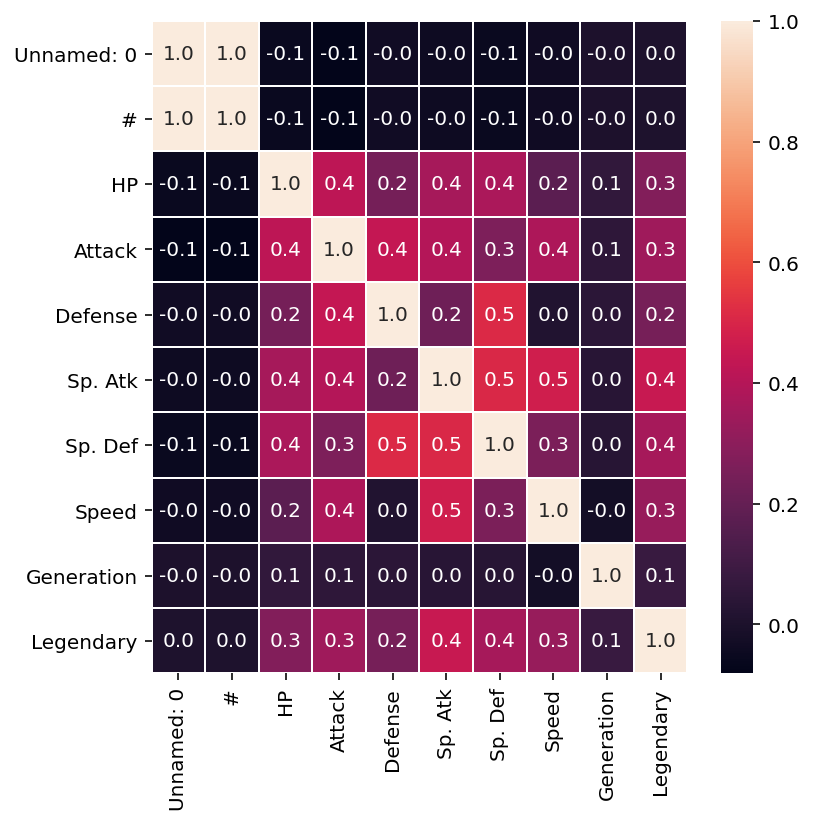

In [41]:
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(
    data.corr(),
    annot=True,
    linewidths=.5,
    fmt= '.1f',
    ax=ax
)
plt.show()

Notice that long the diagonals the correlation is 1.0. This is because the diagonals represent the correlation of each value with itself!

## Assignment: Build your own Pokemon Team
Now, let's put your skills to the test: build your ultimate Pokemon team. Use your data analysis skills to find 6 Pokemon with the best combination of attack, defense, speed, etc. to defeat your opponents. A good team should have the following qualities:
-  A wide variety of Pokemon types, so your team won't have any weaknesses
-  High stat totals, so you can outclass your opponents

Create a new dataframe that contains only your 6 Pokemon using the Pokemon dataset that is provided. Then, plot some graphs that show off your team's statistics. Feel free to reference earlier parts of this code to get a sense of how to load Pokemon and build a team out of them!

In [ ]:
#Build the best 6 Pokemon team you possibly can.

# for reference this is how we loaded Pikachu: pikachu = data[data['Name'] == 'Pikachu']

### YOUR CODE HERE ###

#Plot some graphs that show off your team's statistics.

### YOUR CODE HERE ###

## Extra

Now that you have found your ultimate Pokemon team, let's think about whether this team would be feasible in a battle against your fellow trainers. Is there anything your team is particularly susceptible to? Anything your team is particularly good against? Look [here][1] for a link to the the different Pokemon types and their strengths and weaknesses!

[1]: <https://pokemondb.net/type>

## Challenge Assignment: Sahai, the Shapeshifting Pokemon
UC Berkeley Pokemon trainers have been beating Stanford Pokemon trainers for decades. Recently, however, Stanford has acquired some powerful Pokemon that are difficult to beat. Thus, Berkeley Labs are trying to synthesize a new, ultimate Pokemon that can shapeshift its stats to beat any opponent.

The shapeshifting Pokemon, named "Sahai", has three shape-shifting forms: Attack, Defense, and Speed. These shapeshifting forms are a set of statistics that are "stolen" from another Pokemon. Each form has the following criteria:
-  The stat line is "stolen" from another Pokemon (Ex. Attack form may be Pikachu's exact statistics)
-  The stat line for Attack form must have attack in the top 10 of all the Pokemon in the dataset, the stat line for Defense form must have defense in the top 10 of all the Pokemon in the dataset, etc.
-  No stat line can have any statistic that is below average

Create a new dataframe that contains the three forms that Sahai can shapeshift into. Then, write a function that takes in the stats of the Pokemon that it is battling against, and returns the shapeshifting form that it will take on to win the battle.

In [ ]:
#Build the Sahai shapeshifting dataframe

### YOUR CODE HERE ###

#Write the shapeshifting function

def shapeshift(opponent_stats):
    ### YOUR CODE HERE ###